

*   Write a Python code to implement Linear Regression for multi-dimensional input and one-dimensional output using Matrix Inverse. You can use NumPy to do matrix inverse, but you are encouraged to write your own code for this task also.

*   Verify your results using the scikit-learn Linear Regression package.

*   Write a code to minimise the squared error function using Gradient Descent, and compare the results with the above methods.
*   Find the best fit hyperplane for the four synthetic datasets attached. Two of them will directly give good results with the usual Linear Regression algo, one of them will require a non-linear transformation of the input features, and for one of them the standard Linear Regression algo is not suitable. You need to figure out which of the 4 datasets belongs to which of these categories, with proper reasoning.




Submission Deadline : Jan 27, 2024 (Saturday)

Submission Form : https://forms.gle/bLDU3WY1P82Uer6H6





**Data Set -2**

In [1]:
# importing the required module and packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import plotly.express as px

In [2]:
# reading the csv using pandas
df = pd.read_csv("Data2.csv")



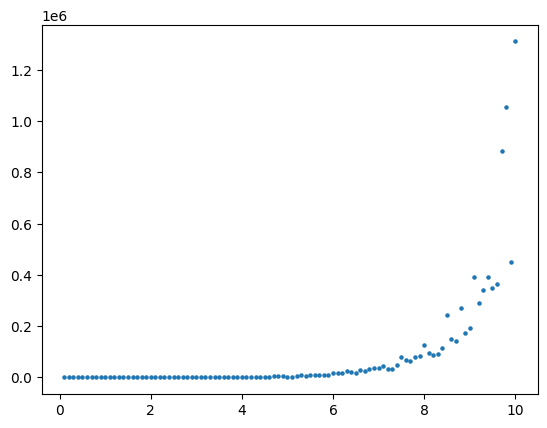

In [3]:
# "X" and "Y" are the list of all xi and yi respectively.
x_value = [float(item) for item in list(df['x'])]
y_value = [float(item) for item in list(df['y'])]

plt.scatter(x_value, y_value, s=5)
plt.show()

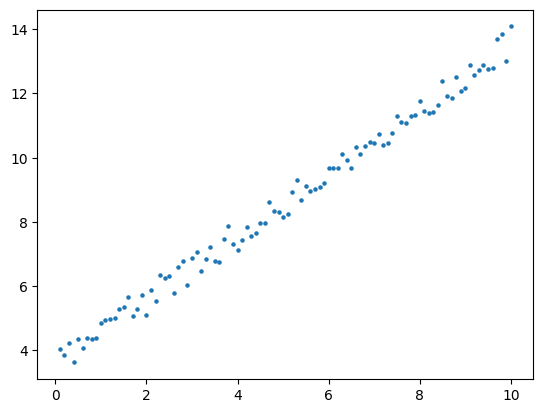

In [4]:
# calculating log of each yi and stored in list
L =[]
for i in y_value:
    k = np.log(i) #log base e
    L.append(k)
# graphical Visualation
plt.scatter(x_value, L, s=5)
plt.show()

In [5]:
# Calculating required parameter
xl_value =[]
x_square=[]
for i in range(100):
  q = x_value[i] * L[i]
  xl_value.append(q)

  p = x_value[i] ** 2
  x_square.append(p)

avg_xl_value = np.mean(xl_value)
avg_x_value = np.mean(x_value)
avg_l_value = np.mean(L)
avg_x_square_value = np.mean(x_square)

In [6]:
beta = (avg_xl_value - avg_x_value * avg_l_value)/(avg_x_square_value - avg_x_value **2) #It is value of m.
log_alpha = (avg_l_value - beta * avg_x_value)
alpha = np.exp(log_alpha)
print("value of beta :", beta)
# print("value of log_alpha :", log_alpha)
print("value of alpha :", alpha)

value of beta : 0.9729974518460589
value of alpha : 39.7306395177676


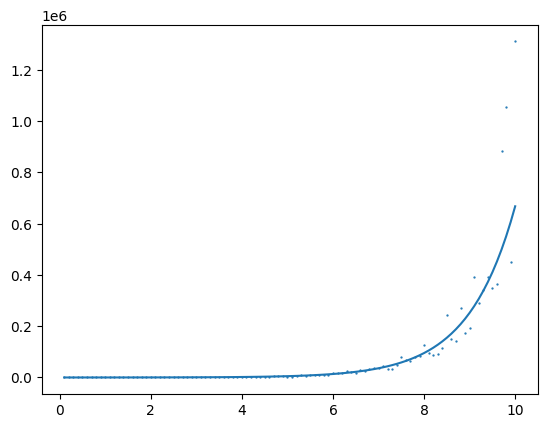

In [7]:

predicted_y_value = []
for i in range(100):
  r = alpha * np.exp(beta * x_value[i])
  predicted_y_value.append(r)

#plotting graph; Given data set is scatter but predicted dataset is in the form of line.
plt.scatter(x_value, y_value, s=0.4, )
plt.plot(x_value, predicted_y_value)

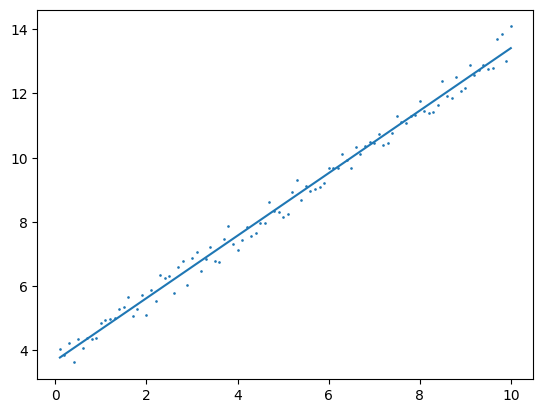

In [8]:
# prediction using own developed regression model
predicted_y_value = []
for i in range(100):
  y = np.log(alpha) + beta * x_value[i]
  r = y
  predicted_y_value.append(r)

#plotting graph; Given data set is scatter but predicted dataset is in the form of line.
plt.scatter(x_value, L, s=0.8, )
plt.plot(x_value, predicted_y_value)

**Verification Of My own LinearRegession Model Relative To SK  Learn Model**

In [9]:

# Applying  linear Regression which is build by SkLearn.
regr = LinearRegression()

x_array = np.array(x_value).reshape(-1, 1)
y_array = np.array(L).reshape(-1, 1)

regr.fit(x_array,y_array)
print("beta: ",regr.coef_)
# print("Intercept: ",regr.intercept_)
alpha = np.exp(regr.intercept_)
print("alpha: ", alpha)

beta:  [[0.97299745]]
alpha:  [39.73063952]


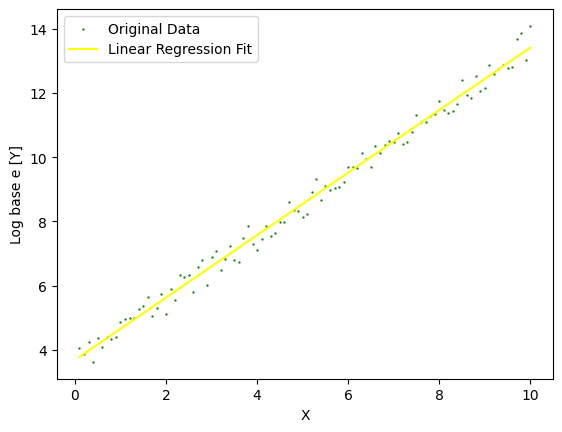

In [10]:
#Now predicting the value of every data.
y_pred_array = regr.predict(x_array)

y_pred_list = list(y_pred_array.reshape(1,-1)[0])

plt.scatter(x_value, L, s=0.4, color='green', label='Original Data')
plt.plot(x_value, y_pred_list, color='yellow', label='Linear Regression Fit')

# plt.tick_params(left = False, bottom = False)
plt.xlabel('X')
plt.ylabel('Log base e [Y]')
plt.legend()
plt.show()

In [11]:
# Error between "prediction by My Own Regression model" and "given data."
mae = mean_absolute_error(y_true = L,y_pred = predicted_y_value )
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true= L,y_pred = predicted_y_value) #default=True
rmse = mean_squared_error(y_true= L,y_pred = predicted_y_value,squared=False)
r_square = r2_score(L, predicted_y_value)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R-sqare :",r_square)

MAE: 0.2349883528902577
MSE: 0.07643342704351971
RMSE: 0.27646596000867757
R-sqare : 0.9904038522690993


In [13]:
# Error between "prediction by SKLearn Regression model" and "given data."

mae = mean_absolute_error(y_true = L,y_pred = y_pred_array )
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true= L,y_pred = y_pred_array) #default=True
rmse = mean_squared_error(y_true= L,y_pred = y_pred_array,squared=False)
r_square = r2_score(L, y_pred_array)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print(r_square)


MAE: 0.23498835289025738
MSE: 0.07643342704351966
RMSE: 0.27646596000867746
0.9904038522690993
